## Ensembled Techniques - Multiple models are combined to create a large complex model

1. Bagging - RandomForest -> Multiple trees will be created in parallel randomly

2. Boosting - GradientBoosting -> Multiple trees are created sequentially corrective models are added

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestiom (Read the train data)

In [2]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# Target Feature - loan_status

1. 0 - Loan Rejected
2. 1 - Loan Approved

## Step 2 - Perform basic Data Quality checks

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
m = df.isna().sum()
m

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df.isna().any()

id                            False
person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                 False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
loan_status                   False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
df.nunique()

id                            58645
person_age                       53
person_income                  2641
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       545
loan_int_rate                   362
loan_percent_income              61
cb_person_default_on_file         2
cb_person_cred_hist_length       29
loan_status                       2
dtype: int64

# Separate X and Y (Loan_status)

In [8]:
X = df.drop(columns = ["id", "loan_status"])
Y = df["loan_status"]

In [9]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [10]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [11]:
Y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

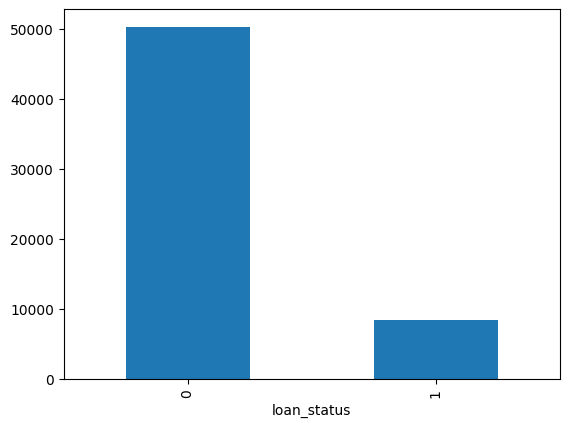

In [12]:
Y.value_counts().plot(kind="bar")

# Step 4 - Apply Train Test Split

test_size = 0.2

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
xtrain.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15
17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9
32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3
55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11
40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2


In [15]:
xtest.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4
56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4
42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6
10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2
39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10


In [16]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [17]:
ytrain.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [19]:
xtrain.shape

(46916, 11)

In [20]:
xtest.shape

(11729, 11)

## Step 5 - Apply Preprocessing pipeline

In [21]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [22]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [24]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [25]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [26]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [ ]:
pre.fit(xtrain) # type: ignore

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [28]:
xtrain_pre = pre.transform(xtrain) # type: ignore
xtest_pre = pre.transform(xtest) # type: ignore

In [29]:
xtrain_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.397825,-0.366415,-1.182680,-0.359703,1.042717,-0.205762,2.274652,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091851,-0.542752,-0.429373,-0.755235,0.321836,-0.424086,0.787969,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422891,0.152225,-1.182680,-0.215873,-0.922425,-0.533248,-0.698714,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.894383,0.281885,-0.680475,1.042639,-1.363513,0.449211,1.283530,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.919449,-0.480515,0.072832,-0.935022,-0.994843,-0.751573,-0.946495,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
xtest_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
4657,-0.753930,-0.625734,-1.182680,-0.988958,-0.882925,-0.751573,-0.450934,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,-0.422891,-0.107095,1.077242,-0.755235,-0.688715,-0.860735,-0.450934,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.735746,0.056277,-1.182680,1.941575,0.608214,1.104183,0.044628,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,-0.919449,-0.885054,-1.182680,-0.755235,-0.030376,0.121724,-0.946495,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,-0.091851,-0.107095,-0.931577,-0.395660,0.502879,-0.424086,1.035750,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Step 6 - Model Building

1. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="gini",
    random_state=42
)
model1.fit(xtrain_pre, ytrain)

,n_estimators,1
,criterion,'gini'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
model1.score(xtrain_pre, ytrain)

0.8892062409412567

In [33]:
model1.score(xtest_pre, ytest)

0.8898456816437889

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores

array([0.72279494, 0.72635258, 0.7231691 , 0.7148717 , 0.71601813])

In [35]:
scores.mean()

np.float64(0.7206412887791828)

In [36]:
scores.std()

np.float64(0.004434155722193511)

### Tuning the random forest

In [37]:
params1 = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : [3, 4, 5],
    "min_samples_leaf" : [5, 6, 7]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=42)
rscv_rf = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring="f1_macro", random_state=42)
rscv_rf.fit(xtrain_pre, ytrain)


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [3, 4, ...], 'min_samples_leaf': [5, 6, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [40]:
rscv_rf.best_params_

{'n_estimators': 50, 'min_samples_leaf': 7, 'max_depth': 5}

In [41]:
rscv_rf.best_score_

np.float64(0.8601350539949509)

In [42]:
best_rf = rscv_rf.best_estimator_
best_rf

,n_estimators,50
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,7
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
best_rf.score(xtrain_pre, ytrain) # type: ignore

0.9391678744991048

In [ ]:
best_rf.score(xtest_pre, ytest) # type: ignore

0.939807315201637

In [45]:
from sklearn.metrics import f1_score
# Classification
results = []

def evaluate_and_log_model_class(results, model, xtrain, ytrain, xtest, ytest, description):
    # Cross validate results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
    cv_mean = scores.mean().round(4)
    cv_std = scores.std().round(4)
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate f1 macro on train and test
    f1_train = round(f1_score(ytrain, ypred_train, average="macro"), 4)
    f1_test = round(f1_score(ytest, ypred_test, average="macro"), 4)
    # Get the generalization error
    gen_error = round(abs(f1_train -  f1_test), 4)
    # Store above results in dictionary
    r = {
        "description": description,
        "model": type(model).__name__,
        "cv_mean": cv_mean,
        "cv_std": cv_std,
        "f1_train": f1_train,
        "f1_test": f1_test,
        "gen_error": gen_error
    }
    print(r)
    results.append(r)
    return model

In [46]:
sel_rf = evaluate_and_log_model_class(
    results, best_rf, xtrain_pre, ytrain, xtest_pre, ytest,
    description="Tuned Random Forest Model"
)

{'description': 'Tuned Random Forest Model', 'model': 'RandomForestClassifier', 'cv_mean': np.float64(0.8601), 'cv_std': np.float64(0.0057), 'f1_train': 0.8569, 'f1_test': 0.8573, 'gen_error': 0.0004}


## Get feature importances

In [47]:
sel_rf.feature_importances_

array([8.12123094e-04, 6.65303600e-02, 1.69395361e-02, 3.24520547e-02,
       1.31778507e-01, 3.36526932e-01, 3.23054323e-04, 3.19302931e-02,
       1.35836351e-05, 1.84931568e-02, 8.07240177e-02, 9.20892303e-03,
       2.52097303e-03, 3.11298427e-03, 9.80824465e-03, 5.66898402e-04,
       2.23075318e-03, 1.27278432e-02, 4.62042085e-03, 1.84749831e-02,
       1.81463208e-01, 2.08652245e-02, 6.91338018e-04, 0.00000000e+00,
       9.88582280e-03, 7.29876518e-03])

In [48]:
xtrain_pre.columns

Index(['num__person_age', 'num__person_income', 'num__person_emp_length',
       'num__loan_amnt', 'num__loan_int_rate', 'num__loan_percent_income',
       'num__cb_person_cred_hist_length',
       'cat__person_home_ownership_MORTGAGE',
       'cat__person_home_ownership_OTHER', 'cat__person_home_ownership_OWN',
       'cat__person_home_ownership_RENT', 'cat__loan_intent_DEBTCONSOLIDATION',
       'cat__loan_intent_EDUCATION', 'cat__loan_intent_HOMEIMPROVEMENT',
       'cat__loan_intent_MEDICAL', 'cat__loan_intent_PERSONAL',
       'cat__loan_intent_VENTURE', 'cat__loan_grade_A', 'cat__loan_grade_B',
       'cat__loan_grade_C', 'cat__loan_grade_D', 'cat__loan_grade_E',
       'cat__loan_grade_F', 'cat__loan_grade_G',
       'cat__cb_person_default_on_file_N', 'cat__cb_person_default_on_file_Y'],
      dtype='object')

In [49]:
imp = pd.Series(sel_rf.feature_importances_, index=xtrain_pre.columns)
imp

num__person_age                        0.000812
num__person_income                     0.066530
num__person_emp_length                 0.016940
num__loan_amnt                         0.032452
num__loan_int_rate                     0.131779
num__loan_percent_income               0.336527
num__cb_person_cred_hist_length        0.000323
cat__person_home_ownership_MORTGAGE    0.031930
cat__person_home_ownership_OTHER       0.000014
cat__person_home_ownership_OWN         0.018493
cat__person_home_ownership_RENT        0.080724
cat__loan_intent_DEBTCONSOLIDATION     0.009209
cat__loan_intent_EDUCATION             0.002521
cat__loan_intent_HOMEIMPROVEMENT       0.003113
cat__loan_intent_MEDICAL               0.009808
cat__loan_intent_PERSONAL              0.000567
cat__loan_intent_VENTURE               0.002231
cat__loan_grade_A                      0.012728
cat__loan_grade_B                      0.004620
cat__loan_grade_C                      0.018475
cat__loan_grade_D                      0

In [50]:
imp.sort_values(ascending=False)

num__loan_percent_income               0.336527
cat__loan_grade_D                      0.181463
num__loan_int_rate                     0.131779
cat__person_home_ownership_RENT        0.080724
num__person_income                     0.066530
num__loan_amnt                         0.032452
cat__person_home_ownership_MORTGAGE    0.031930
cat__loan_grade_E                      0.020865
cat__person_home_ownership_OWN         0.018493
cat__loan_grade_C                      0.018475
num__person_emp_length                 0.016940
cat__loan_grade_A                      0.012728
cat__cb_person_default_on_file_N       0.009886
cat__loan_intent_MEDICAL               0.009808
cat__loan_intent_DEBTCONSOLIDATION     0.009209
cat__cb_person_default_on_file_Y       0.007299
cat__loan_grade_B                      0.004620
cat__loan_intent_HOMEIMPROVEMENT       0.003113
cat__loan_intent_EDUCATION             0.002521
cat__loan_intent_VENTURE               0.002231
num__person_age                        0

<Axes: >

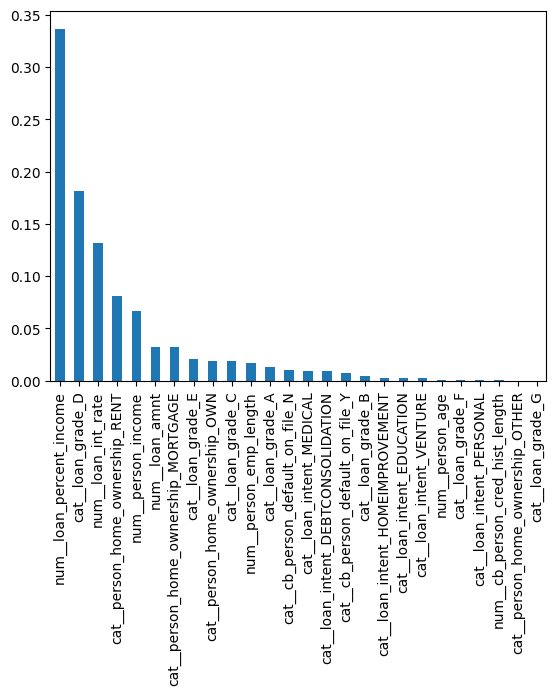

In [51]:
imp.sort_values(ascending=False).plot(kind="bar")

<Axes: >

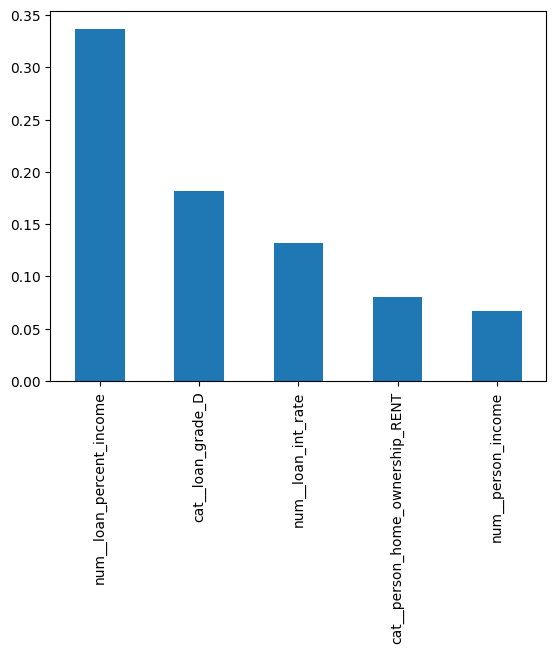

In [52]:
imp.sort_values(ascending=False).head(5).plot(kind="bar")

# Gradient Boosting

In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier

model2 = HistGradientBoostingClassifier(
    learning_rate=0.00001,
    max_iter=1,
    max_depth=1,
    min_samples_leaf=5,
    random_state=42
)

scores2 = cross_val_score(model2, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores2

array([0.46149432, 0.4615208 , 0.4615208 , 0.4614899 , 0.4614899 ])

In [54]:
scores2.mean()

np.float64(0.46150314474007625)

In [55]:
scores2.std()

np.float64(1.450831496756599e-05)

## Tuning Gradient boosting model

In [56]:
params2 = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_leaf": [5, 6, 7]
}

In [57]:

gbc = HistGradientBoostingClassifier(random_state=42)

rscv_gb = RandomizedSearchCV(gbc, params2, cv=5, scoring="f1_macro", random_state=42)
rscv_gb.fit(xtrain_pre, ytrain)

,estimator,HistGradientB...ndom_state=42)
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'min_samples_leaf': [5, 6, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [58]:
rscv_gb.best_params_

{'min_samples_leaf': 7, 'max_depth': 5, 'learning_rate': 0.1}

In [59]:
rscv_gb.best_score_

np.float64(0.8897704487483932)

In [60]:
best_gb = rscv_gb.best_estimator_
best_gb

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,5
,min_samples_leaf,7
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [61]:
sel_gb = evaluate_and_log_model_class(
    results, best_gb, xtrain_pre, ytrain, xtest_pre, ytest,
    description="Tuned Gradient Boost Model"
)

{'description': 'Tuned Gradient Boost Model', 'model': 'HistGradientBoostingClassifier', 'cv_mean': np.float64(0.8898), 'cv_std': np.float64(0.0057), 'f1_train': 0.8984, 'f1_test': 0.8926, 'gen_error': 0.0058}


In [62]:
results

[{'description': 'Tuned Random Forest Model',
  'model': 'RandomForestClassifier',
  'cv_mean': np.float64(0.8601),
  'cv_std': np.float64(0.0057),
  'f1_train': 0.8569,
  'f1_test': 0.8573,
  'gen_error': 0.0004},
 {'description': 'Tuned Gradient Boost Model',
  'model': 'HistGradientBoostingClassifier',
  'cv_mean': np.float64(0.8898),
  'cv_std': np.float64(0.0057),
  'f1_train': 0.8984,
  'f1_test': 0.8926,
  'gen_error': 0.0058}]

## 3. xgboost - Extreme gradient boosting

In [63]:
!uv add xgboost

Resolved 70 packages in 2.82s
Prepared 1 package in 27.67s
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 286ms
 + xgboost==3.0.4


In [64]:
import xgboost as xgb

In [65]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3
)

sel_xgb = evaluate_and_log_model_class(
    results, xgb_model, xtrain_pre, ytrain, xtest_pre, ytest,
    description="XGboost model"
)

{'description': 'XGboost model', 'model': 'XGBClassifier', 'cv_mean': np.float64(0.8913), 'cv_std': np.float64(0.0066), 'f1_train': 0.9013, 'f1_test': 0.894, 'gen_error': 0.0073}


In [66]:
results

[{'description': 'Tuned Random Forest Model',
  'model': 'RandomForestClassifier',
  'cv_mean': np.float64(0.8601),
  'cv_std': np.float64(0.0057),
  'f1_train': 0.8569,
  'f1_test': 0.8573,
  'gen_error': 0.0004},
 {'description': 'Tuned Gradient Boost Model',
  'model': 'HistGradientBoostingClassifier',
  'cv_mean': np.float64(0.8898),
  'cv_std': np.float64(0.0057),
  'f1_train': 0.8984,
  'f1_test': 0.8926,
  'gen_error': 0.0058},
 {'description': 'XGboost model',
  'model': 'XGBClassifier',
  'cv_mean': np.float64(0.8913),
  'cv_std': np.float64(0.0066),
  'f1_train': 0.9013,
  'f1_test': 0.894,
  'gen_error': 0.0073}]

In [67]:
results_df = pd.DataFrame(results)
results_df

,description,model,cv_mean,cv_std,f1_train,f1_test,gen_error
0,Tuned Random Forest Model,RandomForestClassifier,0.8601,0.0057,0.8569,0.8573,0.0004
1,Tuned Gradient Boost Model,HistGradientBoostingClassifier,0.8898,0.0057,0.8984,0.8926,0.0058
2,XGboost model,XGBClassifier,0.8913,0.0066,0.9013,0.8940,0.0073


In [68]:
results_df.sort_values(by = "cv_mean", ascending=False)

,description,model,cv_mean,cv_std,f1_train,f1_test,gen_error
2,XGboost model,XGBClassifier,0.8913,0.0066,0.9013,0.8940,0.0073
1,Tuned Gradient Boost Model,HistGradientBoostingClassifier,0.8898,0.0057,0.8984,0.8926,0.0058
0,Tuned Random Forest Model,RandomForestClassifier,0.8601,0.0057,0.8569,0.8573,0.0004


## Based on above results no model is overfitting you can select xgboost model here
## Because of highest cross validated results

In [69]:
results_df.to_csv("evaluation.csv", index=False)

In [70]:
sel_xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [71]:
imp2 = pd.Series(sel_xgb.feature_importances_, index=xtrain_pre.columns)
imp2

num__person_age                        0.006534
num__person_income                     0.019373
num__person_emp_length                 0.021507
num__loan_amnt                         0.004575
num__loan_int_rate                     0.042696
num__loan_percent_income               0.120172
num__cb_person_cred_hist_length        0.003270
cat__person_home_ownership_MORTGAGE    0.006745
cat__person_home_ownership_OTHER       0.005168
cat__person_home_ownership_OWN         0.040677
cat__person_home_ownership_RENT        0.187714
cat__loan_intent_DEBTCONSOLIDATION     0.071834
cat__loan_intent_EDUCATION             0.007944
cat__loan_intent_HOMEIMPROVEMENT       0.034464
cat__loan_intent_MEDICAL               0.031862
cat__loan_intent_PERSONAL              0.006547
cat__loan_intent_VENTURE               0.019037
cat__loan_grade_A                      0.000000
cat__loan_grade_B                      0.004858
cat__loan_grade_C                      0.028062
cat__loan_grade_D                      0

In [72]:
imp2.sort_values(ascending=False)

cat__loan_grade_D                      0.319366
cat__person_home_ownership_RENT        0.187714
num__loan_percent_income               0.120172
cat__loan_intent_DEBTCONSOLIDATION     0.071834
num__loan_int_rate                     0.042696
cat__person_home_ownership_OWN         0.040677
cat__loan_intent_HOMEIMPROVEMENT       0.034464
cat__loan_intent_MEDICAL               0.031862
cat__loan_grade_C                      0.028062
num__person_emp_length                 0.021507
num__person_income                     0.019373
cat__loan_intent_VENTURE               0.019037
cat__loan_grade_E                      0.011076
cat__loan_intent_EDUCATION             0.007944
cat__person_home_ownership_MORTGAGE    0.006745
cat__loan_intent_PERSONAL              0.006547
num__person_age                        0.006534
cat__person_home_ownership_OTHER       0.005168
cat__loan_grade_B                      0.004858
num__loan_amnt                         0.004575
cat__cb_person_default_on_file_N       0

<Axes: >

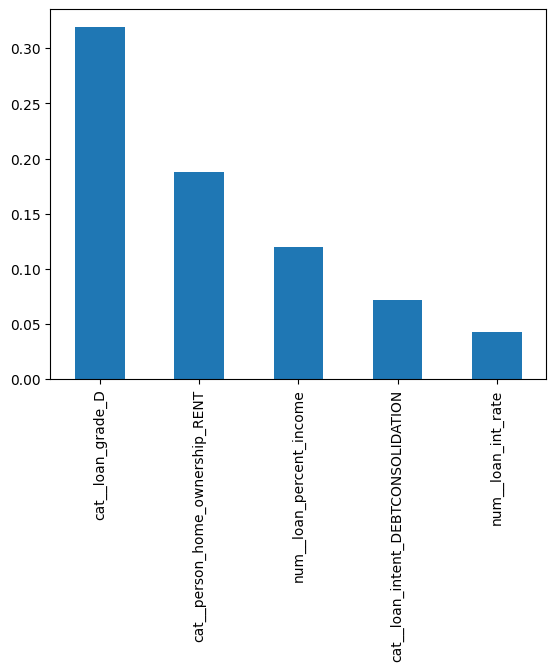

In [73]:
imp2.sort_values(ascending=False).head(5).plot(kind="bar")

## Step 7 - Evaluate selected model in detail

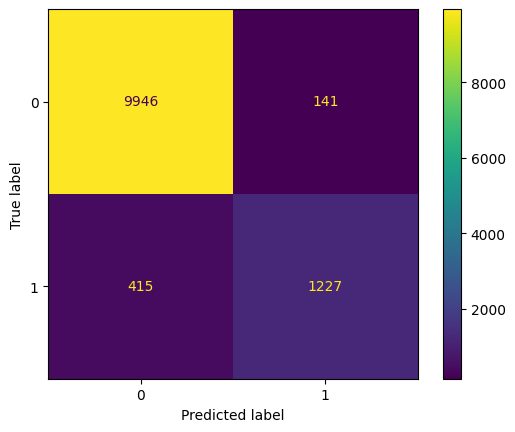

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(sel_xgb, xtest_pre, ytest)

In [75]:
ypred_test = sel_xgb.predict(xtest_pre)
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [76]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [77]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.75      0.82      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.87      0.89     11729
weighted avg       0.95      0.95      0.95     11729



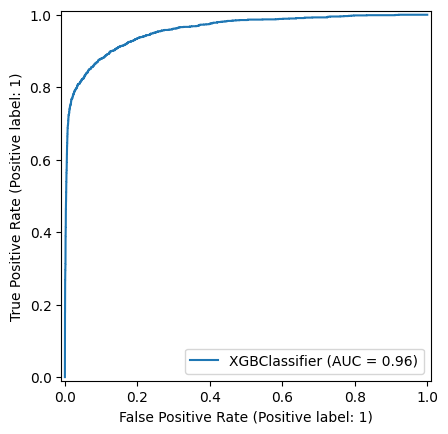

In [78]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(sel_xgb, xtest_pre, ytest)

## Above model is suitable for out of sample prediction
## Step 9 - Out of Sample prediction

In [79]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [80]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [ ]:
xnew_pre = pre.transform(xnew) # type: ignore
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.753930,0.126293,-0.429373,2.840512,1.671432,2.195805,-0.946495,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257371,0.826456,0.323935,0.143702,0.657589,-0.642411,-0.450934,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257371,-0.885054,0.072832,-0.935022,2.142144,-0.314924,-0.946495,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.901266,-0.366415,-0.178270,-0.395660,-0.586672,-0.205762,0.292408,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257371,0.982048,0.826140,1.042639,1.855767,-0.096600,-0.450934,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [82]:
preds = sel_xgb.predict(xnew_pre)
preds[0:5]

array([1, 0, 1, 0, 0])

In [83]:
xgb_model.classes_

array([0, 1])

In [84]:
probs = sel_xgb.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.99372286, 0.01560067, 0.62725747, 0.00724052, 0.02030855],
      dtype=float32)

In [85]:
res = xnew[["id"]]
res["loan_status"] = preds
res["probability"] = probs.round(4)

In [86]:
res

,id,loan_status,probability
0,58645,1,0.9937
1,58646,0,0.0156
2,58647,1,0.6273
3,58648,0,0.0072
4,58649,0,0.0203
...,...,...,...
39093,97738,0,0.0626
39094,97739,0,0.0052
39095,97740,0,0.0076
39096,97741,0,0.1927


In [87]:
res["loan_status"].value_counts()

loan_status
0    34779
1     4319
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

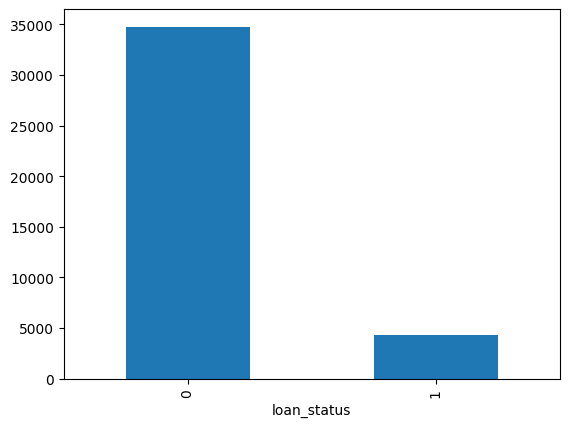

In [88]:
res["loan_status"].value_counts().plot(kind="bar")

In [89]:
res.to_csv("results.csv", index=False)

## Step 10 - Save preprocessor and model object

In [90]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [91]:
sel_xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [92]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [93]:
joblib.dump(sel_xgb, "load_model.joblib")

['load_model.joblib']

## Load model projects

In [95]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [96]:
m = joblib.load("load_model.joblib")
m

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
